### Kelimelerin Vektörel olarak sembolize edilmesi (Word2vec)

In [1]:
# Bilgisayarın dilimizi anlaması için ilk adım kelimeleri anlamasını sağlamaktır.

#### Kelimelerin temsil edilmesi

In [3]:
# Kelimeleri ONE-HOT   vektör olarak temsil edebiliriz.

In [4]:
# Şimdi şöyle Google'da "Dell notebook ücreti" diye arama yaptıgımız 
#zaman aynı zamanda "Dell laptop fiyatı" ile ilgili sonuçların da karşımıza 
#çıkmasını isteriz

In [5]:
# ONE-HOT VEKTORLER İLE KELİMELER ARASINDAKİ İLİŞKİ SAKLANMIYOR

dolayısıyla yapmamız gereken

#### Kelime Vektörleri

In [6]:
# Her kelime için birer vektör oluşturacağız
# Vektörler kelimeler arasındaki anlamsal bilgileri saklayacak
# Birbirine benzer kelimelerin vektörleri birbirine yakın olacak.
# Kelime vektörü oluşturmak için en modern yontemler : word2vec , GloVe

In [7]:
# Not:Kelime vektörü, word vector, word embedding, embedding hep aynı şeyi ifade ediyor.

                                        Word2vec
               * kenardaki kelimeler ortadaki kelimeyi temsil eder
       ...boynuzların ticareti içiç avlanan gergedan, boynuzun ozellikle...
      ..neandertal insanlar ile su aygırı,gergedan, aslan, fil gibi hayva..
      
                                        

                               Word2vec Algoritmaları
                               
  * Skip-gram : Ortadaki kelimelerden kenardaki kelimeleri tahmin eder.
  * Continuous bag of words (CBOW) : Kenardaki kelimelerden ortadaki kelimeyi tahmin eder.
                               
                               
                               

### Skip-gram Algoritması

In [8]:
# Ortadaki kelimeye göre kenardaki kelimeleri tahmin ediyor.
# Input: orta kelime, output: kenardaki kelimeler
# Ortadaki kelimenin sagından ve solundan pencere büyüklüğü kadar kelime tahmin ediliyor
# Pencere büyüklüğü 2 ise sağdan iki kelime ve soldan iki kelime dikkate alınır

skip-gram
* Cbow'a göre küçük corpus da daha iyi sonuç verir
* Cbow'a göre yavaş

CBOW
* Eğitim daha hızlı
* Sık kullanılan kelimeleri daha iyi temsil eder
* Daha büyük corpus'a ihtiyaç duyar ve nadir kelimeleri temsil etmekte sıkıntı yaşayabilir

In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE  # vektorleri grafiğe dökebilmek için
import matplotlib.pyplot as plt  # grafiği çizebilmek için
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

In [2]:
f = open('hurriyet.txt','r',encoding = 'utf8')
text = f.read()

t_list = text.split('\n')  # split le ayırdık çünkü cümleler zaten satırlara bölünmüş

In [3]:
corpus = []

for cumle in t_list:
    corpus.append(cumle.split())
    

In [4]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [5]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)  

 #### * window = 5 ortadaki kelimenin solundan ve sağından 5 er kelime alınacak, min_count= 5 corpus da en az 5 defa geçen kelimeleri alıyoruz sg= 1 diyerek skip-gram algoritmasını kullandığımızı belirttik çünkü default olarak CBOW algoritmasını sayıyor

In [6]:
model.wv['ankara']  # görüldüğü gibi vektöre çevirmiş olduk

array([ 0.05195812, -0.4095196 , -0.30636564,  0.28193218,  0.5945994 ,
        0.03338937, -0.33020106,  0.7271133 , -0.07777999, -0.3289505 ,
       -0.02133458, -0.27340582, -0.12395076,  0.3625247 , -0.30247468,
        0.5285968 ,  0.36547685, -0.47730607,  0.17081277, -0.6957468 ,
       -0.32283005,  0.32997632,  0.63586557, -0.6674893 , -0.0015471 ,
        0.11587914, -0.32747623, -0.1306288 , -0.24182078,  0.58173853,
        0.42593274,  0.17982249, -0.00345208, -0.5186298 ,  0.20679979,
       -0.20120691, -0.2547598 ,  0.0700419 ,  0.05745922, -0.5548196 ,
        0.58719945, -0.08997966,  0.4004371 , -0.16542327,  0.3927654 ,
        0.05636888, -0.40742454, -0.02301528,  0.09348061, -0.12803513,
        0.05910947, -0.13591452,  0.21330246, -0.35133582, -0.17521387,
       -0.26762033, -0.02468185,  0.18493469, -0.40680572, -0.5924853 ,
        0.01235475,  0.18485601,  0.07458473,  0.34310234, -0.10782281,
        0.07670075,  0.10192087,  0.08629187, -0.19644713, -0.03

In [7]:
model.wv.most_similar('hollanda')

[('danimarka', 0.8286641240119934),
 ('avusturya', 0.8243297934532166),
 ('belçika', 0.7990153431892395),
 ('almanya', 0.7571476101875305),
 ('ispanya', 0.7446383833885193),
 ('kanada', 0.7321105599403381),
 ('finlandiya', 0.7316133975982666),
 ('letonya', 0.731437623500824),
 ('avustralya', 0.7269033789634705),
 ('fransa', 0.7190529108047485)]

In [8]:
model.wv.most_similar('pazartesi')

[('perşembe', 0.9179752469062805),
 ('salı', 0.915447473526001),
 ('cumartesi', 0.9016736149787903),
 ('çarşamba', 0.8915318250656128),
 ('cuma', 0.8804355263710022),
 ('günü', 0.8744553327560425),
 ('akşamı', 0.8218414187431335),
 ('sabahı', 0.8133915662765503),
 ('pazar', 0.7995498776435852),
 ('gününden', 0.7456552386283875)]

In [9]:
# oluşturduğumuz bu modeli daha sonra kullanmak için kaydediyoruz

In [10]:
model.save('word2vec.model')

In [11]:
model = Word2Vec.load('word2vec.model')

In [12]:
model

### TSNE ile vektörleri grafiğe dökme

* Manifold learning algoritmaları, asıl olarak veri görselleştirme için kullanılır. t-SNE (t-Distributed Stochastic Neighbor Embedding), en kullanışlı manifold learning algoritmalarından biridir. t-SNE algoritmasının ana fikri, noktalar arasındaki uzaklıkları olabildiğince koruyacak bir şekilde düşük boyutlu bir temsil bulmaktır. t-SNE, her bir veri noktası için rastgele bir düşük boyutlu temsil ile başlar ve, orjinal uzayda yakın olan noktaları birbirine yakın, uzak olanları ise birbirinden uzak tutmaya çalışır. t-SNE, birbirine uzak noktaların arasındaki uzaklığı korumaktansa birbirine yakın noktalara daha çok önem verir.

In [19]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100)) # boş bir numpy arrayı içerisine atadık
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)

# kelimelerin vektorlerini dizi içerisinde topladık 
# kelimelerin kendisini ise liste içerisinde topladık
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
#  annotate sayesinde oluşturdugumuz grafikler üzerinde yazılar yazabiliriz      
    plt.show()

C:\Users\Aleyna\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Aleyna\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


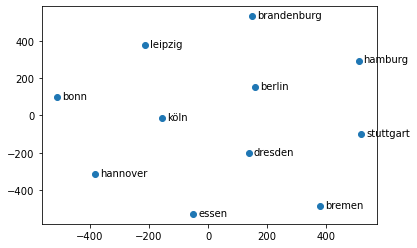

In [20]:
closestwords_tsneplot(model,"berlin")

* Gördüğünüz gibi çoğu sınıf tek bir öbekte toplanmış durumda. Bu metodun bir gözetimsiz öğrenme metodu olduğunu göz önünde bulundurursak – yani, etiketler hakkında hiç bir bilgiye sahip değil – iki boyutta da sınıfları birbirinden ayırabilen bir temsil bulabildi.

In [1]:
closestwords_tsneplot(model,"temmuz")

NameError: name 'closestwords_tsneplot' is not defined